In [2]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
# Setting the path for both the data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Reading the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combining the data from both files into a single dataset
merged_data = pd.merge(study_results,mouse_metadata,how='left')
# Displaying the data table for preview
merged_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [3]:
#Checking the number of mice
len(merged_data['Mouse ID'].unique())

249

In [4]:
#Getting the duplicate data that shows up for mouse ID and timepoint and displaying the Mouse ID that meets the criteria
duplicate_mice = merged_data.loc[merged_data.duplicated(subset=['Mouse ID','Timepoint']),'Mouse ID'].unique()
duplicate_mice_id = pd.DataFrame(duplicate_mice)
duplicate_mice_id

,0
0,g989


In [5]:
#Getting and showing the Data for the duplicate mouse ID 'g989'
duplicate_data = merged_data.loc[merged_data['Mouse ID']=='g989']
duplicate_data

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
107,g989,0,45.000000,0,Propriva,Female,21,26
137,g989,0,45.000000,0,Propriva,Female,21,26
329,g989,5,48.786801,0,Propriva,Female,21,26
360,g989,5,47.570392,0,Propriva,Female,21,26
620,g989,10,51.745156,0,Propriva,Female,21,26
681,g989,10,49.880528,0,Propriva,Female,21,26
815,g989,15,51.325852,1,Propriva,Female,21,26
869,g989,15,53.442020,0,Propriva,Female,21,26
950,g989,20,55.326122,1,Propriva,Female,21,26
1111,g989,20,54.657650,1,Propriva,Female,21,26


In [6]:
#Creating a clean dataframe that drops the duplicate mouse 'g989 by its ID
clean_mouse_data = merged_data.loc[merged_data['Mouse ID']!='g989']
clean_mouse_data.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.0,0,Capomulin,Female,9,22
1,f932,0,45.0,0,Ketapril,Male,15,29
2,g107,0,45.0,0,Ketapril,Female,2,29
3,a457,0,45.0,0,Ketapril,Female,11,30
4,c819,0,45.0,0,Ketapril,Male,21,25


In [7]:
# Checking the number of mice in the clean DataFrame.
number_of_mice = len(clean_mouse_data['Mouse ID'].unique())
print(number_of_mice)

248


In [8]:
# Generating a summary statistics table of mean, median, variance, standard deviation, and SEM (Standard error of the mean) of the tumor volume for each regimen
mean_regimen = clean_mouse_data.groupby('Drug Regimen').mean()['Tumor Volume (mm3)']

median_regimen = clean_mouse_data.groupby('Drug Regimen').median()['Tumor Volume (mm3)']

variance_regimen = clean_mouse_data.groupby('Drug Regimen').var()['Tumor Volume (mm3)']

sdev_regimen = clean_mouse_data.groupby('Drug Regimen').std()['Tumor Volume (mm3)']

SEM_regimen = clean_mouse_data.groupby('Drug Regimen').sem()['Tumor Volume (mm3)']

summary_stats = pd.DataFrame({'Tumor Volume Mean': mean_regimen,
                            'Tumor Volume Median' : median_regimen,
                            'Tumor Volume Variance' : variance_regimen,
                            'Tumor Volume Std. Dev.': sdev_regimen,
                            'Tumor Volume Std. Error': SEM_regimen})
summary_stats

,Tumor Volume Mean,Tumor Volume Median,Tumor Volume Variance,Tumor Volume Std. Dev.,Tumor Volume Std. Error
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [9]:
#Generating the same summary statistics table using the agg method
grouped_clean_data = clean_mouse_data.groupby('Drug Regimen')
summary_stats2 = grouped_clean_data.agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']
summary_stats2

C:\Users\jonyr\AppData\Local\Temp\ipykernel_15072\1147305542.py:3: FutureWarning: ['Mouse ID', 'Sex'] did not aggregate successfully. If any error is raised this will raise in a future version of pandas. Drop these columns/ops to avoid this warning.
  summary_stats2 = grouped_clean_data.agg(['mean','median','var','std','sem'])['Tumor Volume (mm3)']


,mean,median,var,std,sem
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


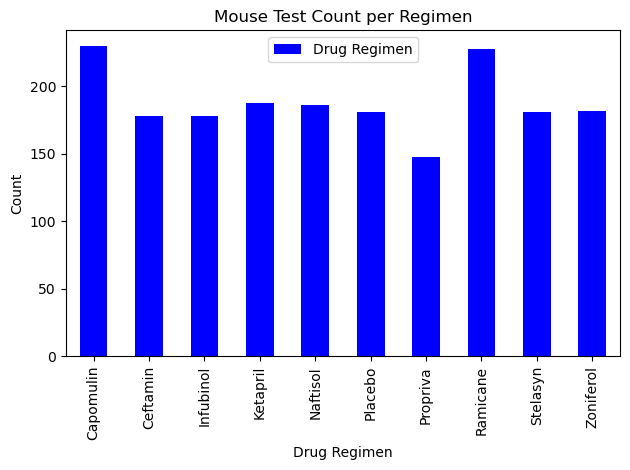

In [10]:
# Generating a bar plot showing the total number of timepoints for all mice tested for each drug regimen using Pandas.
regimengrouping = clean_mouse_data.groupby('Drug Regimen')
regimen_group_count = pd.DataFrame(regimengrouping['Drug Regimen'].count())
pandasplot = regimen_group_count.plot(kind='bar', title='Mouse Test Count per Regimen',color='blue')
pandasplot.set_xlabel('Drug Regimen')
pandasplot.set_ylabel('Count')
plt.tight_layout()
plt.show()


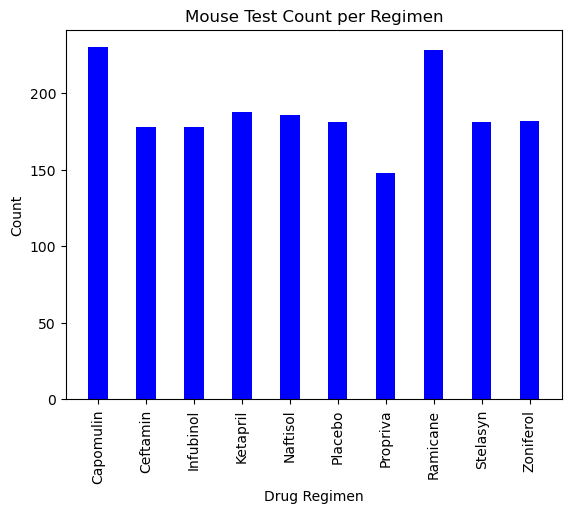

In [11]:
# Generate a bar plot showing the total number of timepoints for all mice tested for each drug regimen using pyplot.
x_axis = np.arange(len(regimen_group_count))
ticks = [x for x in x_axis]

plt.bar(x_axis, regimen_group_count['Drug Regimen'],color='blue',align='center',width = .4)
plt.xticks(ticks, list(regimen_group_count.index),rotation='vertical')
plt.title('Mouse Test Count per Regimen')
plt.xlabel('Drug Regimen')
plt.ylabel('Count')
plt.show()


(-1.1065502689644005,
 1.1003119175697333,
 -1.1079114197007642,
 1.1041200173094385)

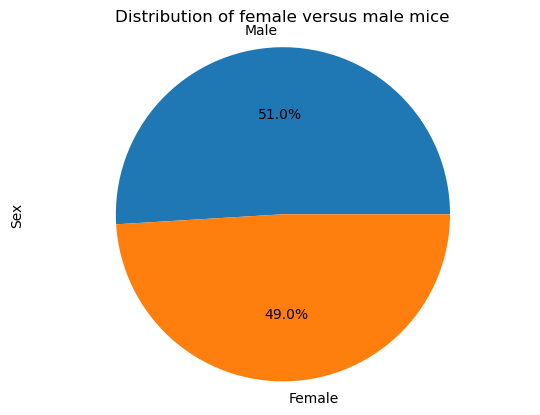

In [12]:
#Generating a pie plot using pandas which shows male vs female mice distribution
clean_mouse_data['Sex'].value_counts().plot(kind='pie',title='Distribution of female versus male mice', autopct='%1.1f%%')
plt.axis('equal')

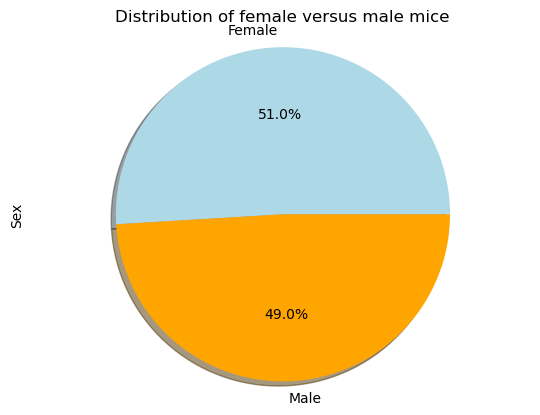

In [13]:
#Generating a pie plot using matplotlib which shows male vs female mice distribution
genders = list(clean_mouse_data['Sex'].unique())
mice_count_genders = clean_mouse_data['Sex'].value_counts()
piecolors = ['lightblue','orange']
plt.pie(mice_count_genders,labels=genders,colors=piecolors,autopct='%1.1f%%',shadow=True)
plt.title('Distribution of female versus male mice')
plt.ylabel("Sex")
plt.axis('equal')
plt.show()

In [14]:
# Calculating the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin
# Start by getting the last (greatest) timepoint for each mouse
mouse_id_grouped_df = clean_mouse_data.groupby("Mouse ID")
last_timepoint = mouse_id_grouped_df["Timepoint"].max()
last_timepoint - last_timepoint.reset_index()


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint
last_timepoint_volume = pd.merge(last_timepoint,clean_mouse_data,on=['Mouse ID','Timepoint'],how='left')
last_timepoint_volume

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
...,...,...,...,...,...,...,...,...
243,z435,10,48.710661,0,Propriva,Female,12,26
244,z578,45,30.638696,0,Ramicane,Male,11,16
245,z581,45,62.754451,3,Infubinol,Female,24,25
246,z795,45,65.741070,3,Naftisol,Female,13,29


In [15]:
# Putting the treatments into a list for for loop (and later for plot labels)
regimens = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Creating an empty list to fill with tumor vol data (for plotting)
vol_tumors = []

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
# Locating the rows which contain mice on each drug and getting the tumor volumes, adding the volume to the empty list vol_tumors
for treatment in regimens:
    temp_df = last_timepoint_volume.loc[last_timepoint_volume['Drug Regimen']==treatment]
    tumor_vol_df = temp_df["Tumor Volume (mm3)"]
    temp_df.append(tumor_vol_df)
    # Determining outliers using upper and lower bounds
    drugquartiles = tumor_vol_df.quantile([.25,.5,.75])
    lowerq = drugquartiles[0.25]
    upperq = drugquartiles[0.75]
    iqr = upperq-lowerq

    print(f'The lower quartile of {treatment} is: {round(lowerq,2)}')
    print(f'The upper quartile of {treatment} is: {round(upperq,2)}')
    print(f'The interquartile range of {treatment} is: {round(iqr,2)}')
    print(f'The median of {treatment} is: {round(drugquartiles[.5],2)}')

    bound_lower = lowerq - (1.5*iqr)
    bound_upper = upperq + (1.5*iqr)
    print(f"Values below {round(bound_lower,2)} are possible outliers for {treatment}.")
    print(f"Values above {round(bound_upper,2)} are possible outliers for {treatment}.")
    outliers = temp_df.loc[(temp_df['Tumor Volume (mm3)']<=bound_lower) | (temp_df['Tumor Volume (mm3)']>=bound_upper)]
    number_of_outliers = len(outliers)
    print(f"\nThe potential outliers for {treatment} are:")
    print(outliers[['Mouse ID','Tumor Volume (mm3)']])
    print('')

The lower quartile of Capomulin is: 32.38
The upper quartile of Capomulin is: 40.16
The interquartile range of Capomulin is: 7.78
The median of Capomulin is: 38.13
Values below 20.7 are possible outliers for Capomulin.
Values above 51.83 are possible outliers for Capomulin.

The potential outliers for Capomulin are:
Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []

The lower quartile of Ramicane is: 31.56
The upper quartile of Ramicane is: 40.66
The interquartile range of Ramicane is: 9.1
The median of Ramicane is: 36.56
Values below 17.91 are possible outliers for Ramicane.
Values above 54.31 are possible outliers for Ramicane.

The potential outliers for Ramicane are:
Empty DataFrame
Columns: [Mouse ID, Tumor Volume (mm3)]
Index: []

The lower quartile of Infubinol is: 54.05
The upper quartile of Infubinol is: 65.53
The interquartile range of Infubinol is: 11.48
The median of Infubinol is: 60.17
Values below 36.83 are possible outliers for Infubinol.
Values above 82.

C:\Users\jonyr\AppData\Local\Temp\ipykernel_15072\3376748817.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df.append(tumor_vol_df)
C:\Users\jonyr\AppData\Local\Temp\ipykernel_15072\3376748817.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df.append(tumor_vol_df)
C:\Users\jonyr\AppData\Local\Temp\ipykernel_15072\3376748817.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df.append(tumor_vol_df)
C:\Users\jonyr\AppData\Local\Temp\ipykernel_15072\3376748817.py:12: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  temp_df.append(tumor_vol_df)


In [23]:
# Creating dataframes for Capomulin, Ramicane, Infubinol, and Ceftamin treatments
capomulin_df = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == 'Capomulin']
ramicane_df = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == 'Ramicane']
infubinol_df = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == 'Infubinol']
ceftamin_df = clean_mouse_data.loc[clean_mouse_data['Drug Regimen'] == 'Ceftamin']

# Start by getting the highest value timepoint for each mouse in each treatment
capomulin_max = capomulin_df.groupby('Mouse ID').max()['Timepoint']
ramicane_max = ramicane_df.groupby('Mouse ID').max()['Timepoint']
infubinol_max = infubinol_df.groupby('Mouse ID').max()['Timepoint']
ceftamin_max = ceftamin_df.groupby('Mouse ID').max()['Timepoint']

# Merging group dataframe with the original dataframe to get the tumor volume at the last timepoint
capomulin_max_df = pd.merge(capomulin_max, clean_mouse_data, on=['Mouse ID','Timepoint']) 
ramicane_max_df = pd.merge(ramicane_max, clean_mouse_data, on=['Mouse ID','Timepoint']) 
infubinol_max_df = pd.merge(infubinol_max, clean_mouse_data, on=['Mouse ID','Timepoint']) 
ceftamin_max_df = pd.merge(ceftamin_max, clean_mouse_data, on=['Mouse ID','Timepoint'])

#Dataframe to be used for box plot
regimen_max = pd.concat([capomulin_max_df,ramicane_max_df,infubinol_max_df,ceftamin_max_df],ignore_index=True)

regimen_max

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,45,38.982878,2,Capomulin,Female,9,22
1,b742,45,38.939633,0,Capomulin,Male,7,21
2,f966,20,30.485985,0,Capomulin,Male,16,17
3,g288,45,37.074024,1,Capomulin,Male,3,19
4,g316,45,40.159220,2,Capomulin,Female,22,22
...,...,...,...,...,...,...,...,...
95,x226,0,45.000000,0,Ceftamin,Male,23,28
96,x581,45,64.634949,3,Ceftamin,Female,19,28
97,x822,45,61.386660,3,Ceftamin,Male,3,29
98,y769,45,68.594745,4,Ceftamin,Female,6,27


Text(0.5, 1.0, 'Final Tumor Volume By Regimen')

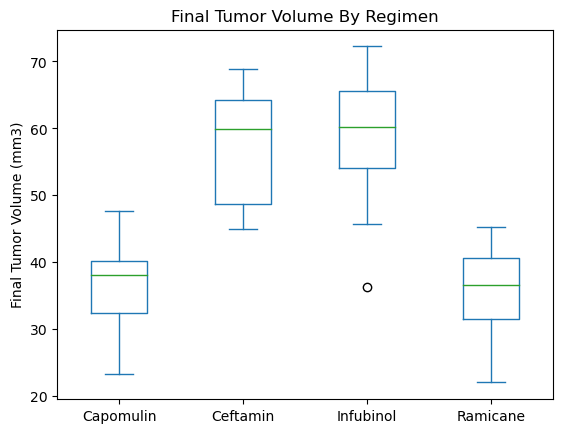

In [26]:
# Generating a box plot of the final tumor volume of each mouse across four regimens of interest
regimen_max.plot.box(column='Tumor Volume (mm3)',by='Drug Regimen')
plt.ylabel('Final Tumor Volume (mm3)')
plt.title('Final Tumor Volume By Regimen')

Text(0.5, 1.0, 'Tumor Volume for Mouse b742 | Treatment: Capomulin')

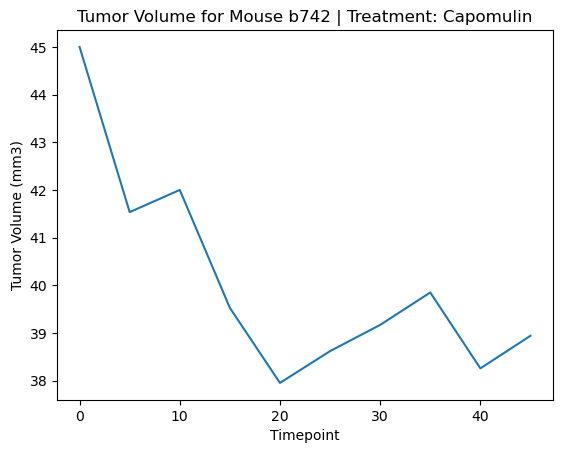

In [28]:
# Generating a line plot of tumor volume vs. time point for a mouse treated with Capomulin
mouse_b742 = clean_mouse_data[clean_mouse_data['Mouse ID'] == 'b742']
plt.plot(mouse_b742['Timepoint'],mouse_b742['Tumor Volume (mm3)'])
plt.xlabel('Timepoint')
plt.ylabel('Tumor Volume (mm3)')
plt.title('Tumor Volume for Mouse b742 | Treatment: Capomulin')

Text(0.5, 1.0, 'Average Tumor Volume vs. Mouse Weight | Treatment: Capomulin')

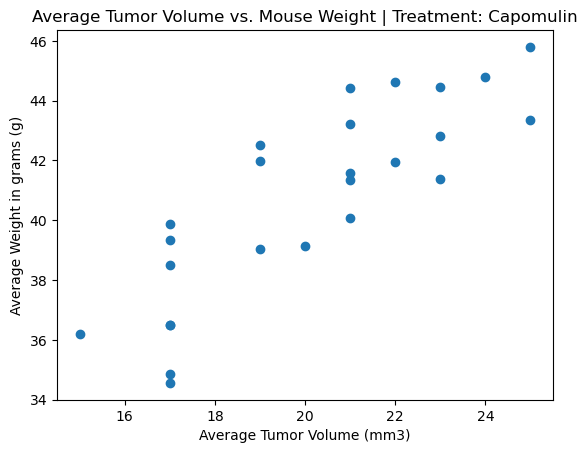

In [33]:
# A scatter plot is generated that shows average tumor volume vs. mouse weight for the Capomulin regimen.
capomulin_regimen = clean_mouse_data[clean_mouse_data['Drug Regimen'] == 'Capomulin']
average_volume = capomulin_regimen.groupby('Mouse ID')['Tumor Volume (mm3)'].mean()
average_weight = capomulin_regimen.groupby('Mouse ID')['Weight (g)'].mean()

plt.scatter(average_weight,average_volume)
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Average Weight in grams (g)')
plt.title('Average Tumor Volume vs. Mouse Weight | Treatment: Capomulin')

The correlation coefficient has a value of 0.842
The linear regression model shows that there is moderate correlation between the average weight and tumor volume of a mouse that has been treated with Capomulin.


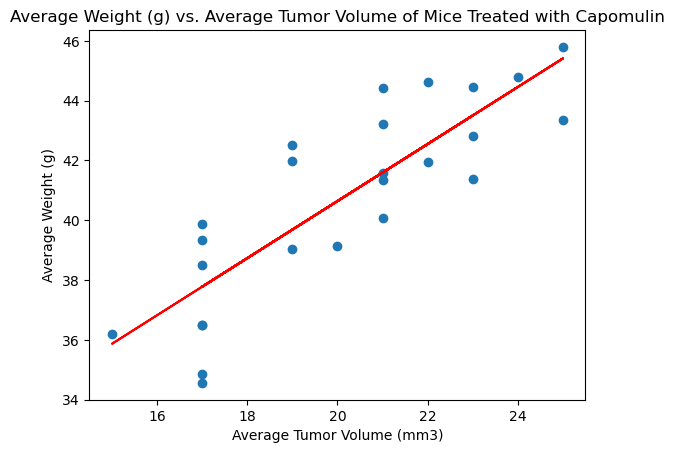

In [38]:
#linear regression function for average tumor volume vs. mouse weight for the Capomulin regimen.
m_avg_tumor, int_avg_tumor, r_avg_tumor, p_avg_tumor, std_avg_tumor = st.linregress(average_weight,average_volume)

#Function for line
line_eq = m_avg_tumor * average_weight + int_avg_tumor

#Plotting linear regression fit
plt.scatter(average_weight, average_volume)
plt.plot(average_weight, line_eq , color = 'red')
plt.xlabel('Average Tumor Volume (mm3)')
plt.ylabel('Average Weight (g)')
plt.title('Average Weight (g) vs. Average Tumor Volume of Mice Treated with Capomulin')

print(f'The correlation coefficient has a value of {r_avg_tumor.round(3)}')
print(f'The linear regression model shows that there is moderate correlation between the average weight and tumor volume of a mouse that has been treated with Capomulin.')